In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
df = pd.read_excel('ccrb_datatransparencyinitiative_20170207.xlsx', sheet_name = 1)

In [4]:
no_vid_cont = df[['Reason For Initial Contact', 'Complaint Has Video Evidence']] \
[df['Complaint Has Video Evidence'] == False].groupby('Reason For Initial Contact').count() / \
len(df[df['Complaint Has Video Evidence'] == False])

vid_cont = df[['Reason For Initial Contact', 'Complaint Has Video Evidence']] \
[df['Complaint Has Video Evidence'] == True].groupby('Reason For Initial Contact').count() / \
len(df[df['Complaint Has Video Evidence'] == True])

contact = no_vid_cont.merge(vid_cont, how = 'outer', left_index = True, right_index = True, \
                              suffixes = ('_False', '_True')).fillna(0)

contact['percent_vid'] = (contact['Complaint Has Video Evidence_True']) / \
    (contact['Complaint Has Video Evidence_True'] + contact['Complaint Has Video Evidence_False'])

contact['percent_novid'] = (contact['Complaint Has Video Evidence_False']) / \
    (contact['Complaint Has Video Evidence_True'] + contact['Complaint Has Video Evidence_False'])
    
contact['range'] = np.arange(len(contact.index))
    
a = contact[['percent_vid', 'percent_novid', 'range']].melt(id_vars=['range'], var_name='vid_novid')

/Users/B/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


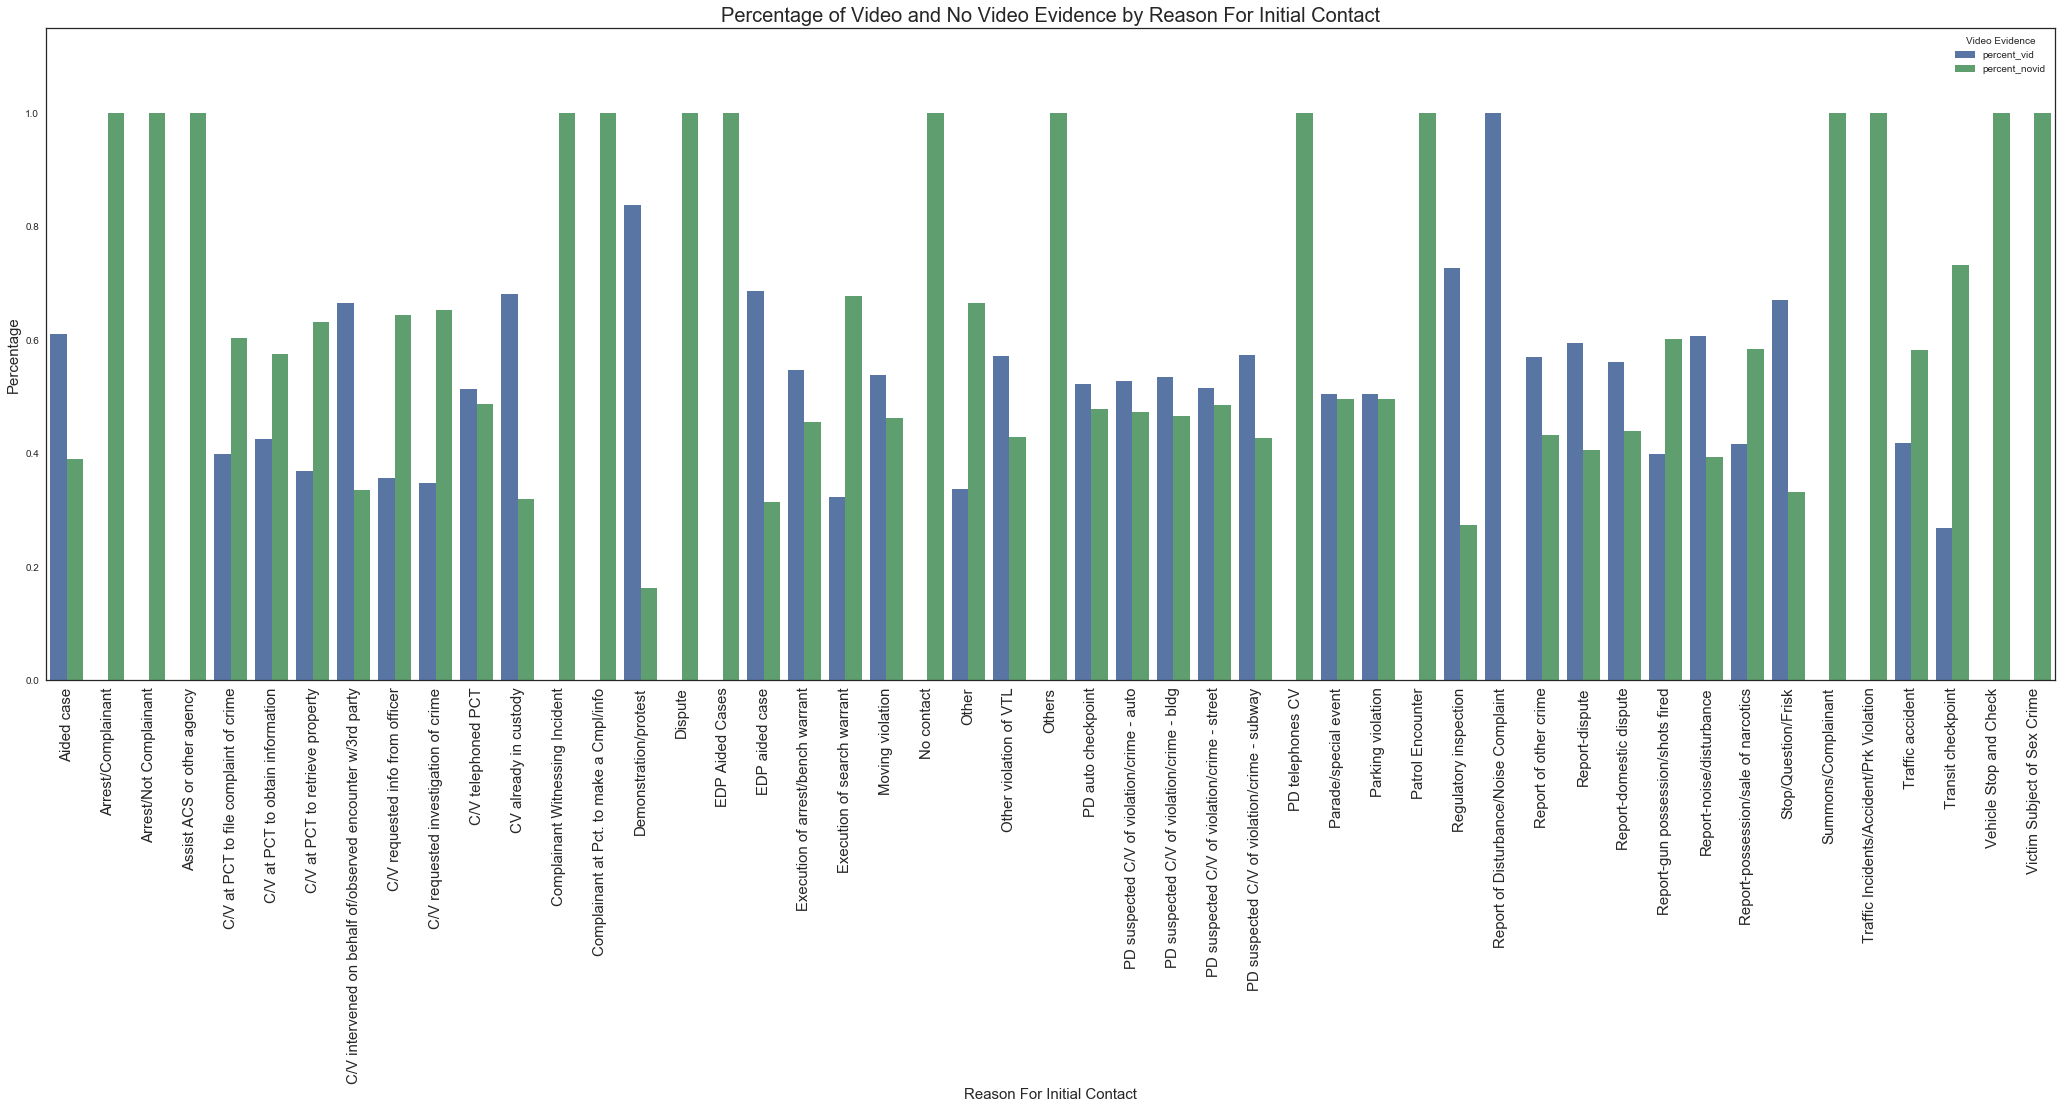

In [6]:
plt.figure(figsize = (36, 12))
sns.barplot(x="range", y="value", hue="vid_novid", data=a);
plt.xticks(np.arange(len(contact.index)), tuple(contact.index), rotation = 90, size = 15);
plt.xlabel('Reason For Initial Contact', size = 15);
plt.ylabel('Percentage', size = 15);
plt.ylim(0, 1.15);
plt.legend(title = 'Video Evidence');
plt.title('Percentage of Video and No Video Evidence by Reason For Initial Contact', size = 20);

plt.savefig('plot1.png', dpi=600, bbox_inches = 'tight')